In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from elasticsearch import Elasticsearch, exceptions as es_exceptions
from elasticsearch.helpers import scan
es = Elasticsearch(hosts=[{'host':'atlas-kibana.mwt2.org', 'port':9200}],timeout=180)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from elasticsearch import Elasticsearch, exceptions as es_exceptions
from elasticsearch.helpers import scan

es = Elasticsearch(hosts=[{'host':'atlas-kibana.mwt2.org', 'port':9200}],timeout=180)

ind="jobs2016"

ss = {
  "query": {
    "filtered": {
      "filter" : {
        "range" : {
          "nevents" : { "gt" : 0 } 
          }
      },
      "query" : {
        "match" : {
          "jeditaskid" : "8764489" 
        }
      }
    }
  }
}

res= es.search( index=ind, body=ss, analyze_wildcard=True)
print (res)
#scroll = scan(es, query=ss, index=ind)
scroll = scan(es, query=ss, index=ind, scroll='10s')

fi=[]
fa=[]
for res in scroll:
    print (res)
    #r=res['fields']
    #if r['jobstatus'][0]=='finished':
    #    fi.append(r['wall_time'][0]/3600)
    #elif r['jobstatus'][0]=='failed':
    #    fa.append(r['wall_time'][0]/3600)


{'hits': {'max_score': None, 'total': 0, 'hits': []}, 'timed_out': False, '_shards': {'successful': 650, 'total': 650, 'failed': 0}, 'took': 64}


1386


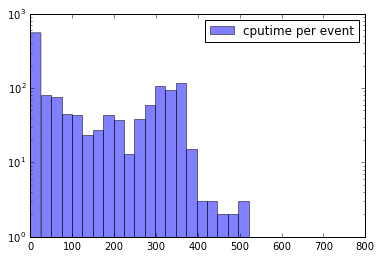

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from elasticsearch import Elasticsearch, exceptions as es_exceptions
from elasticsearch.helpers import scan

es = Elasticsearch(hosts=[{'host':'atlas-kibana.mwt2.org', 'port':9200}],timeout=180)

indices=es.indices.get_aliases().keys()
jobs_indices=[]
sorted_indices = sorted(indices)
for index in sorted_indices:
    if "jobs_archive_2016" in index:
        jobs_indices.append(index)
        #print(index)
ss = {
  "fields": ["nevents","wall_time","jobstatus","cpuconsumptiontime","pandaid","transformation","jobmetrics"],
  "query": {
    "filtered": {
      "filter" : {
        "range" : {
          "nevents" : { "gt" : 0 } 
          }
      },
      "query" : {
        "match" : {
          "jeditaskid" : "8764489" 
        }
      }
    }
  }
}

fi=[]
fa=[]

for ind in jobs_indices:
    scroll = scan(es, query=ss, index=ind, scroll='10s')
    for res in scroll:
        r = res['fields']
        if r['transformation'][0] == 'Sim_tf.py' and int(r['cpuconsumptiontime'][0]) > 0 :            
            #print(r)
            #print (r['nevents'][0])
            #print (r['cpuconsumptiontime'][0])
            fi.append(float(r['cpuconsumptiontime'][0])/float(r['nevents'][0]))

#for ind in jobs_indices:
#    res= es.search( index=ind, body=ss, analyze_wildcard=True)
#    print (res)

print (len(fi))

plt.hist([fi],bins=30, log=True, alpha=0.5, stacked=False, label=['cputime per event'])
plt.legend(loc='upper right')
plt.show()

6198


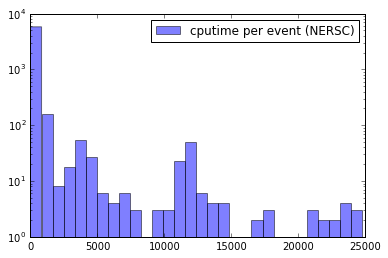

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from elasticsearch import Elasticsearch, exceptions as es_exceptions
from elasticsearch.helpers import scan

es = Elasticsearch(hosts=[{'host':'atlas-kibana.mwt2.org', 'port':9200}],timeout=180)

indices=es.indices.get_aliases().keys()
jobs_indices=[]
sorted_indices = sorted(indices)
for index in sorted_indices:
    if "jobs_archive_2016" in index:
        jobs_indices.append(index)
        #print(index)
ss = {
  "fields": ["nevents","wall_time","jobstatus","cpuconsumptiontime","pandaid","transformation","jobmetrics"],
  "query": {
    "filtered": {
      "filter" : {
        "range" : {
          "nevents" : { "gt" : 0 } 
          }
      },
      "query" : {
        "match" : {
          "jeditaskid" : "8848710" 
        }
      }
    }
  }
}

fi=[]
fa=[]

for ind in jobs_indices:
    scroll = scan(es, query=ss, index=ind, scroll='10s')
    for res in scroll:
        r = res['fields']
        if r['transformation'][0] == 'Sim_tf.py' and int(r['cpuconsumptiontime'][0]) > 0 :            
            #print(r)
            #print (r['nevents'][0])
            #print (r['cpuconsumptiontime'][0])
            fi.append(float(r['cpuconsumptiontime'][0])/float(r['nevents'][0]))

#for ind in jobs_indices:
#    res= es.search( index=ind, body=ss, analyze_wildcard=True)
#    print (res)

print (len(fi))

plt.hist([fi],bins=30, log=True, alpha=0.5, stacked=False, label=['cputime per event (NERSC)'])
plt.legend(loc='upper right')
plt.show()